<a href="https://colab.research.google.com/github/HRJ369/CL249--Computational-Lab/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged in 5064 iterations with error 9.99e-06


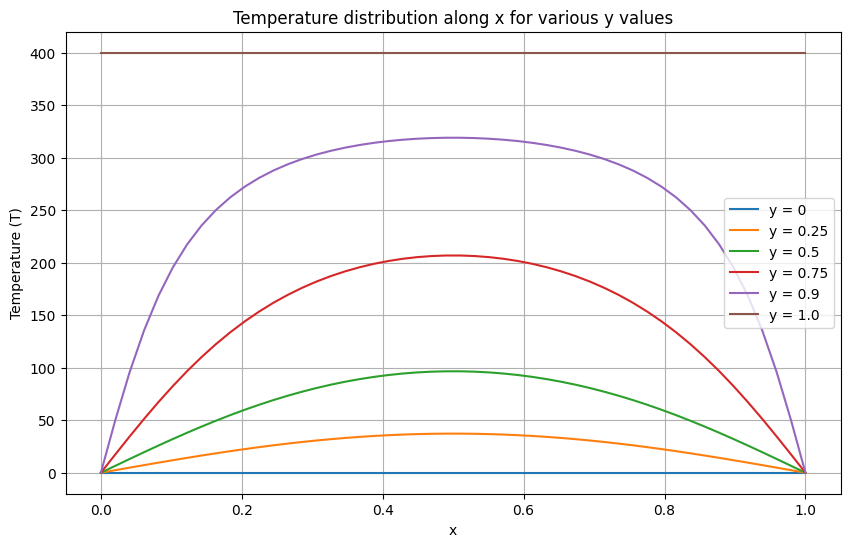

The temperature at (x=0.6, y=0.4) is approximately 64.88°C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx, ny = 50, 50  # Number of grid points
Lx, Ly = 1.0, 1.0  # Length of the rectangle in the x and y directions
dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing

# Boundary conditions
T_left = 0
T_right = 0
T_bottom = 0
T_top = 400

# Initialize the temperature grid
T = np.zeros((ny, nx))

# Apply boundary conditions
T[:, 0] = T_left  # Left boundary
T[:, -1] = T_right  # Right boundary
T[0, :] = T_bottom  # Bottom boundary
T[-1, :] = T_top  # Top boundary

# Iterative solver parameters
tolerance = 1e-5
max_iterations = 10000
iteration = 0
error = 1.0

# Iterative solver (Gauss-Seidel method)
while error > tolerance and iteration < max_iterations:
    T_old = T.copy()
    error = 0.0
    # Update the temperature values for the interior points
    for i in range(1, ny-1):
        for j in range(1, nx-1):
            T[i, j] = 0.25 * (T_old[i+1, j] + T_old[i-1, j] + T_old[i, j+1] + T_old[i, j-1])
            error = max(error, abs(T[i, j] - T_old[i, j]))

    iteration += 1

# Print number of iterations and final error
print(f'Converged in {iteration} iterations with error {error:.2e}')

# Part (i) Plotting the temperature at different y values
x = np.linspace(0, Lx, nx)
y_values = [0, 0.25, 0.5, 0.75, 0.9, 1.0]

plt.figure(figsize=(10, 6))
for y_val in y_values:
    y_index = int(y_val * (ny - 1))
    plt.plot(x, T[y_index, :], label=f'y = {y_val}')

plt.xlabel('x')
plt.ylabel('Temperature (T)')
plt.title('Temperature distribution along x for various y values')
plt.legend()
plt.grid()
plt.show()

# Part (ii) Finding the value of T at (x=0.6, y=0.4)
x_index = int(0.6 * (nx - 1))
y_index = int(0.4 * (ny - 1))
T_value = T[y_index, x_index]

print(f'The temperature at (x=0.6, y=0.4) is approximately {T_value:.2f}°C')


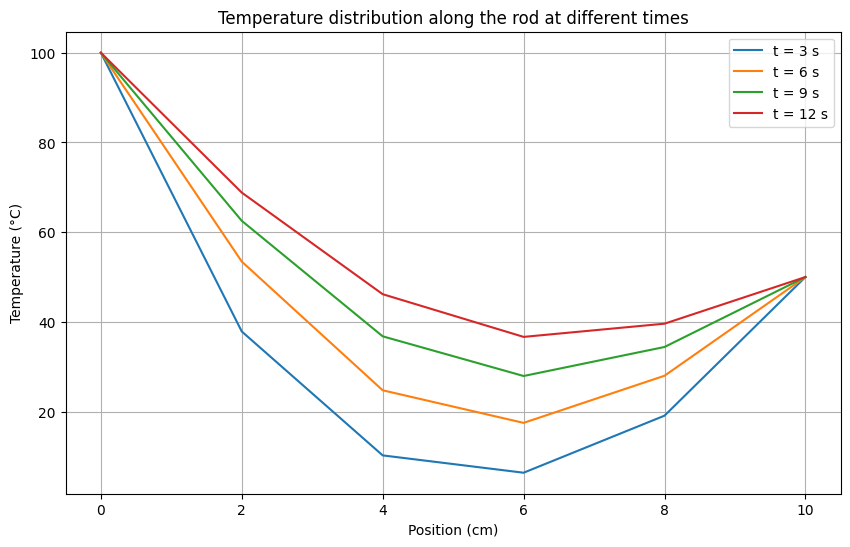

The temperature at x = 2 cm and t = 9 s is approximately 62.52°C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0  # Length of the rod in cm
dx = 2.0  # Spatial step in cm
dt = 0.1  # Time step in s
k = 0.835  # Thermal diffusivity in cm^2/s

nx = int(L / dx) + 1  # Number of spatial points
nt = int(12 / dt) + 1  # Total number of time steps to simulate for 12 seconds

# Stability criterion for the explicit method
alpha = k * dt / (dx ** 2)
if alpha > 0.5:
    raise ValueError("Stability condition violated. Choose a smaller time step.")

# Initialize temperature array
T = np.zeros((nt, nx))

# Set boundary conditions
T[:, 0] = 100.0  # Left boundary at 100°C
T[:, -1] = 50.0  # Right boundary at 50°C

# Time-marching solution using the explicit method
for n in range(0, nt - 1):
    for i in range(1, nx - 1):
        T[n + 1, i] = T[n, i] + alpha * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

# Part (i) Plot temperature profiles at t = 3, 6, 9, 12 seconds
times = [3, 6, 9, 12]  # Seconds
time_indices = [int(t / dt) for t in times]

x = np.linspace(0, L, nx)
plt.figure(figsize=(10, 6))
for t_idx, time in zip(time_indices, times):
    plt.plot(x, T[t_idx, :], label=f't = {time} s')

plt.xlabel('Position (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature distribution along the rod at different times')
plt.legend()
plt.grid()
plt.show()

# Part (ii) Find the temperature at x = 2 cm and t = 9 s
x_index = int(2 / dx)
t_index = int(9 / dt)
temperature_at_2_9 = T[t_index, x_index]

print(f'The temperature at x = 2 cm and t = 9 s is approximately {temperature_at_2_9:.2f}°C')



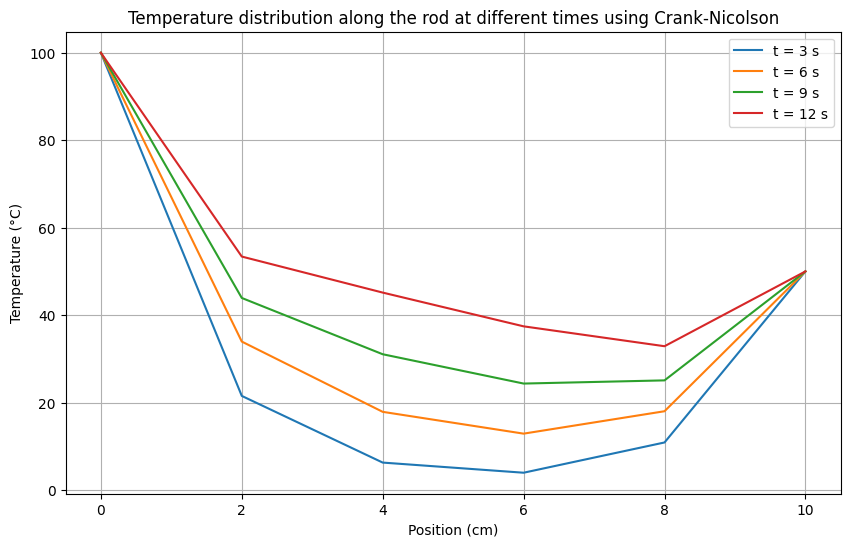

The temperature at x = 2 cm and t = 9 s is approximately 43.93°C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
L = 10.0  # Length of the rod in cm
dx = 2.0  # Spatial step in cm
dt = 0.1  # Time step in s
k = 0.835  # Thermal diffusivity in cm^2/s

nx = int(L / dx) + 1  # Number of spatial points
nt = int(12 / dt) + 1  # Total number of time steps

# Stability factor
alpha = k * dt / (2 * dx ** 2)

# Initialize temperature array
T = np.zeros((nt, nx))

# Set boundary conditions
T[:, 0] = 100.0  # Left boundary condition
T[:, -1] = 50.0  # Right boundary condition

# Coefficients for the Crank-Nicolson scheme
lower_diag = -alpha * np.ones(nx-2)  # Lower diagonal (sub-diagonal)
main_diag = (1 + alpha) * np.ones(nx-2)  # Main diagonal
upper_diag = -alpha * np.ones(nx-2)  # Upper diagonal (super-diagonal)

# Setup the matrix for solve_banded
ab = np.zeros((3, nx-2))
ab[0, 1:] = upper_diag[:-1]  # Upper diagonal
ab[1, :] = main_diag  # Main diagonal
ab[2, :-1] = lower_diag[1:]  # Lower diagonal

# Time-marching solution using Crank-Nicolson
for n in range(0, nt-1):
    # Right-hand side vector for current time step
    b = T[n, 1:-1] + alpha * (T[n, 2:] - 2 * T[n, 1:-1] + T[n, :-2])
    # Solve the tridiagonal system
    T_new = solve_banded((1, 1), ab, b)
    # Update the temperature profile
    T[n+1, 1:-1] = T_new

# Part (i) Plot temperature profiles at t = 3, 6, 9, 12 seconds
times = [3, 6, 9, 12]  # Seconds
time_indices = [int(t / dt) for t in times]

x = np.linspace(0, L, nx)
plt.figure(figsize=(10, 6))
for t_idx, time in zip(time_indices, times):
    plt.plot(x, T[t_idx, :], label=f't = {time} s')

plt.xlabel('Position (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature distribution along the rod at different times using Crank-Nicolson')
plt.legend()
plt.grid()
plt.show()

# Part (ii) Find the temperature at x = 2 cm and t = 9 s
x_index = int(2 / dx)
t_index = int(9 / dt)
temperature_at_2_9 = T[t_index, x_index]

print(f'The temperature at x = 2 cm and t = 9 s is approximately {temperature_at_2_9:.2f}°C')


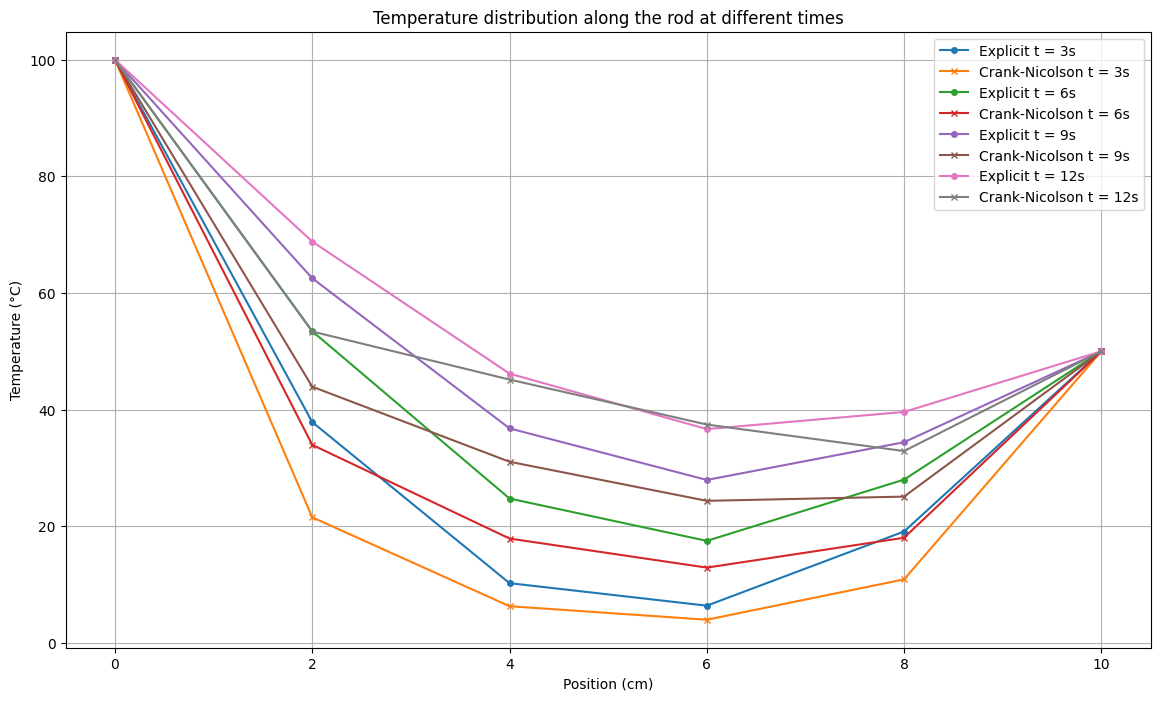

Explicit Method: Temperature at x = 2 cm and t = 9 s is 62.52°C
Crank-Nicolson Method: Temperature at x = 2 cm and t = 9 s is 43.93°C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
L = 10.0  # Length of the rod in cm
dx = 2.0  # Spatial step in cm
dt = 0.1  # Time step in s
k = 0.835  # Thermal diffusivity in cm^2/s

nx = int(L / dx) + 1  # Number of spatial points
nt = int(12 / dt) + 1  # Total number of time steps

# Stability factor for explicit method
alpha_explicit = k * dt / dx**2

# Initialize temperature arrays for both methods
T_explicit = np.zeros((nt, nx))
T_cn = np.zeros((nt, nx))

# Set boundary conditions for both methods
T_explicit[:, 0] = 100.0  # Left boundary condition
T_explicit[:, -1] = 50.0  # Right boundary condition

T_cn[:, 0] = 100.0  # Left boundary condition
T_cn[:, -1] = 50.0  # Right boundary condition

# Explicit method time-marching solution
for n in range(0, nt-1):
    for i in range(1, nx-1):
        T_explicit[n+1, i] = T_explicit[n, i] + alpha_explicit * (T_explicit[n, i+1] - 2*T_explicit[n, i] + T_explicit[n, i-1])

# Crank-Nicolson coefficients
alpha_cn = k * dt / (2 * dx**2)
lower_diag = -alpha_cn * np.ones(nx-2)
main_diag = (1 + alpha_cn) * np.ones(nx-2)
upper_diag = -alpha_cn * np.ones(nx-2)

# Setup the matrix for solve_banded
ab = np.zeros((3, nx-2))
ab[0, 1:] = upper_diag[:-1]
ab[1, :] = main_diag
ab[2, :-1] = lower_diag[1:]

# Crank-Nicolson time-marching solution
for n in range(0, nt-1):
    b = T_cn[n, 1:-1] + alpha_cn * (T_cn[n, 2:] - 2 * T_cn[n, 1:-1] + T_cn[n, :-2])
    T_new = solve_banded((1, 1), ab, b)
    T_cn[n+1, 1:-1] = T_new

# Plot temperature profiles at t = 3, 6, 9, 12 seconds for both methods
times = [3, 6, 9, 12]  # seconds
time_indices = [int(t / dt) for t in times]

x = np.linspace(0, L, nx)
plt.figure(figsize=(14, 8))
for t_idx, time in zip(time_indices, times):
    plt.plot(x, T_explicit[t_idx, :], 'o-', label=f'Explicit t = {time}s', markersize=4)
    plt.plot(x, T_cn[t_idx, :], 'x-', label=f'Crank-Nicolson t = {time}s', markersize=4)

plt.xlabel('Position (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature distribution along the rod at different times')
plt.legend()
plt.grid()
plt.show()

# Find temperature at x = 2 cm and t = 9 s for both methods
x_index = int(2 / dx)
t_index = int(9 / dt)

temp_explicit_at_2_9 = T_explicit[t_index, x_index]
temp_cn_at_2_9 = T_cn[t_index, x_index]

print(f'Explicit Method: Temperature at x = 2 cm and t = 9 s is {temp_explicit_at_2_9:.2f}°C')
print(f'Crank-Nicolson Method: Temperature at x = 2 cm and t = 9 s is {temp_cn_at_2_9:.2f}°C')


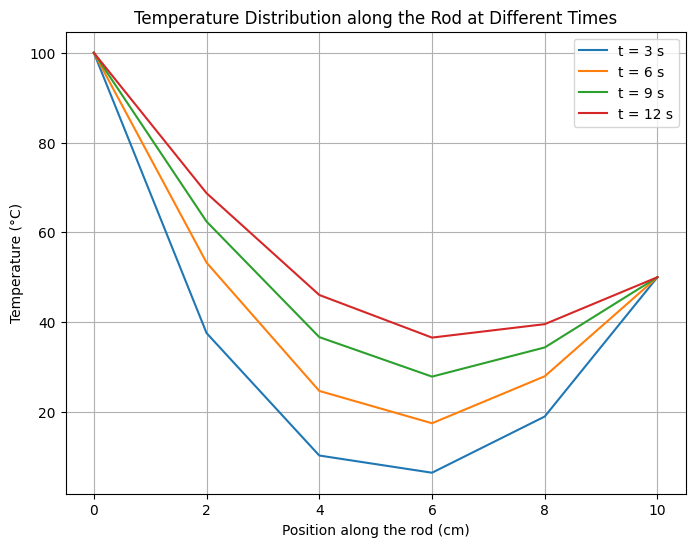

Temperature at x = 2 cm and t = 9 s: 62.39 °C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
L = 10  # Length of the rod in cm
Nx = 6  # Number of grid points (length/Δx + 1)
dx = 2  # Spatial step size in cm
dt = 0.1  # Time step size in seconds
Nt = int(12 / dt)  # Number of time steps for t = 12 seconds
k = 0.835  # Thermal diffusivity in cm^2/s

# Boundary conditions
T0 = 100  # Temperature at x=0 in degrees Celsius
T10 = 50  # Temperature at x=L in degrees Celsius

# Initialize the temperature array
T = np.zeros((Nt + 1, Nx))
T[:, 0] = T0  # Left boundary condition
T[:, -1] = T10  # Right boundary condition

# Crank-Nicolson coefficient
alpha = k * dt / (dx ** 2)

# Time marching using the Crank-Nicolson method
for n in range(0, Nt):
    # Right-hand side vector (b) for the system A * T_new = b
    b = np.zeros(Nx-2)
    for i in range(1, Nx-1):
        b[i-1] = (1 - alpha) * T[n, i] + alpha / 2 * (T[n, i+1] + T[n, i-1])

    # Adjust for the boundary conditions
    b[0] += alpha / 2 * T0
    b[-1] += alpha / 2 * T10

    # Coefficients for the tridiagonal matrix
    A = np.zeros((Nx-2, Nx-2))
    for i in range(Nx-2):
        A[i, i] = 1 + alpha
        if i > 0:
            A[i, i-1] = -alpha / 2
        if i < Nx-3:
            A[i, i+1] = -alpha / 2

    # Gaussian elimination
    for i in range(Nx-2):
        # Make the diagonal contain all non-zero elements
        for j in range(i + 1, Nx-2):
            if A[j, i] != 0:
                ratio = A[j, i] / A[i, i]
                A[j, :] -= ratio * A[i, :]
                b[j] -= ratio * b[i]

    # Back substitution
    T_new = np.zeros(Nx-2)
    T_new[-1] = b[-1] / A[-1, -1]
    for i in range(Nx-3, -1, -1):
        T_new[i] = (b[i] - np.dot(A[i, i+1:], T_new[i+1:])) / A[i, i]

    # Update the temperature for the next time step
    T[n+1, 1:Nx-1] = T_new

# Time points to plot
time_points = [3, 6, 9, 12]
time_indices = [int(t / dt) for t in time_points]

# Plot the results
x = np.linspace(0, L, Nx)

plt.figure(figsize=(8, 6))
for t_idx, t in zip(time_indices, time_points):
    plt.plot(x, T[t_idx, :], label=f't = {t} s')

plt.xlabel('Position along the rod (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution along the Rod at Different Times')
plt.legend()
plt.grid(True)
plt.show()

# Find the temperature at x = 2 cm and t = 9 s
x_target = 2
t_target = 9
i_target = int(x_target / dx)
t_idx_target = int(t_target / dt)
T_target = T[t_idx_target, i_target]

print(f"Temperature at x = 2 cm and t = 9 s: {T_target:.2f} °C")